In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
import scipy.stats as stats

In [149]:


def qqPlot(data,refData):
    # Create sorted quantiles of the data and the corresponding theoretical quantiles
    # each data point gets a quantile in both the sorted quantiles,theoretical quantiles (refernce data)
    sorted_data = np.sort(data)
    theoretical_quantiles = np.percentile(refData, np.linspace(0, 100, len(refData)))

    # Plot the QQ plot
    plt.figure()
    plt.scatter(theoretical_quantiles, sorted_data ,marker = ".")
    plt.plot(theoretical_quantiles, theoretical_quantiles, color='r')
    plt.title('QQ Plot of Normal Distribution')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()



def qqFit(data1,data2,data3):
    data1_quantiles = np.percentile(data1, np.linspace(0, 100, len(data3)))
    data2_quantiles = np.percentile(data2, np.linspace(0, 100, len(data3)))
    # we assume the distribution of data1,data2 is the same  
    # changes are due to machne error (they are anchor to each other) 
    # create lookup table where for any quantile q2_i in data2  
    # f(q2_i)=q1_i:
    # data2_into_data1 =np.interp(data3, data2_quantiles, data1_quantiles)
    
    # data3 is not with the same distribution as data1,data2 but with same errors as data 2
    # i.e we transfer it to be with same errors as data1 to be able to compare to each other
    data3_into_data1 = np.interp(data3, data2_quantiles, data1_quantiles)
    return data3_into_data1

def fit1(df1,df2):
    mu1 = df1.mean()
    sigma1 = df1.std()

    mu2 = df2.mean()
    sigma2 = df2.std()

    df1_fit = (df1/sigma1-mu1/sigma1 + mu2/sigma2)*sigma2
    return df1_fit

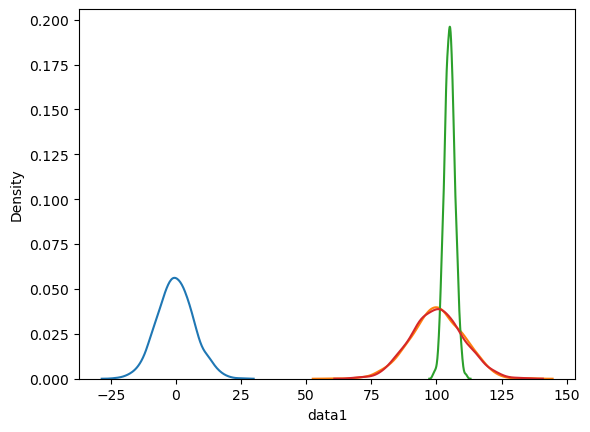

In [198]:
df1 = pd.DataFrame({'data1':np.random.normal(loc=0, scale=7, size=1000)})
df2 = pd.DataFrame({'data2': np.random.normal(loc=100, scale=10, size=1000)})
df3 = pd.DataFrame({'data3': np.random.normal(loc=105, scale=2, size=1000)})
                   

# data1 = np.random.normal(loc=40, scale=5, size=1000)
# data2 = np.random.normal(loc=5, scale=4, size=100)
# data3 = np.random.normal(loc=7, scale=2, size=500)
sns.kdeplot(df1['data1'])
sns.kdeplot(df2['data2'])
sns.kdeplot(df3['data3'])

df3['data3_into_data1'] = qqFit(df1['data1'],df2['data2'],df3['data3'])
df2['data2_into_data1'] = qqFit(df1['data1'],df2['data2'],df2['data2'])

df3['data3_fit'] = fit1(df3['data3'],df2['data2'])
sns.kdeplot(df3['data3_fit'])

df3['data3_fit_into_data1'] = qqFit(df1['data1'],df2['data2'],df3['data3_fit'].copy())



3.0280985318242712 1.2875688835752508
105.03165877668933 1.9938418056622276


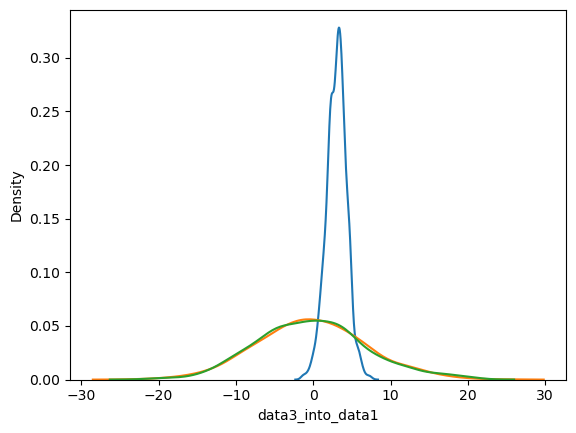

In [206]:
def fit2(df3_fitted,df1,df2,df3):
    mu3 = df3.mean()
    sigma3 = df3.std()

    mu2 = df2.mean()
    sigma2 = df2.std()
    
    mu1 = df1.mean()
    sigma1 = df1.std()

    df3_fit = (df3_fitted/sigma3-mu3/sigma3 + mu2/sigma2)*sigma2
    return df3_fit

# # sns.kdeplot(data2_into_data1)
# sns.kdeplot(data3_into_data1)
plt.figure()
sns.kdeplot(df3['data3_into_data1'] )
sns.kdeplot(df1['data1'])
# sns.kdeplot(df2['data2_into_data1'])
# plt.figure()
# sns.kdeplot(data2)

sns.kdeplot(df3['data3_fit_into_data1'] )
# sns.kdeplot(fit1(df3['data3_into_data1'] ,df1['data1']))
# qqPlot(df3['data3_into_data1'],df1['data1'])
# qqPlot(df2['data2_into_data1'],df1['data1'])

# sns.kdeplot(fit2(df3['data3_fit_into_data1'],df1['data1'],df2['data2'],df3['data3']))
x= df3['data3_into_data1']
print(x.mean(),x.std())
x= df3['data3']
print(x.mean(),x.std())
